**OUTLIERS**

Outliers are those data points in a dataset which shows characteristics outside the general range of the dataset.

**Effect of Outliers**

- they tends to create deviations in the data parameters like mean, std deviation etc

**Source of outliers**

- Experimental Errors in the observations
- External factors while performing the experiment
- variation in the source of data collection

**Methods to detect Outliers in a dataset**

- Scatter plot
- Box plot
- Z-score method
- Inter Quartile Range Method

**Lets check some outliers**

In [110]:
dataset= [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

As you can see the dataset have 3 points which are above 100.
- check whats the mean and std deviation with those 3 100+ value and without them

In [111]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [112]:
# with outliers
mean = np.mean(dataset)
std = np.std(dataset)
print(f'the mean is {mean} and standard deviation is {std} with the outliers')

the mean is 21.176470588235293 and standard deviation is 26.37230118696876 with the outliers


In [113]:
# without outliers
dataset_without_outliers = [element for element in dataset if element < 100]
mean = np.mean(dataset_without_outliers)
std = np.std(dataset_without_outliers)
print(f'the mean is {mean} and standard deviation is {std} with the outliers')

the mean is 13.0 and standard deviation is 2.109884571066817 with the outliers


As can be seen the presence of outliers shifts the mean and Std to higher or lower side than the general values

**Check for outliers using Scatter plot**

[]

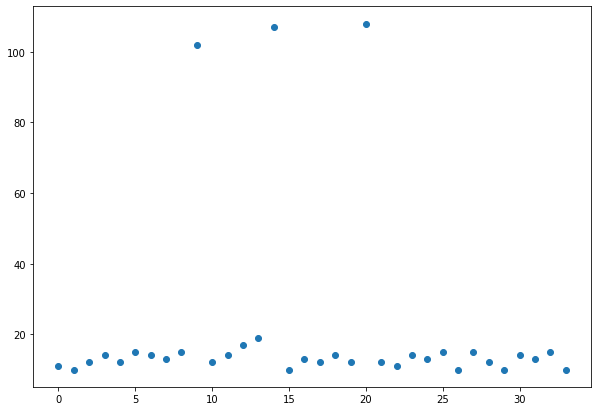

In [114]:
plt.figure(figsize=(10,7))
plt.scatter(np.arange(0,len(dataset)),np.array(dataset))
plt.plot()

**Check using Box plot**

[]

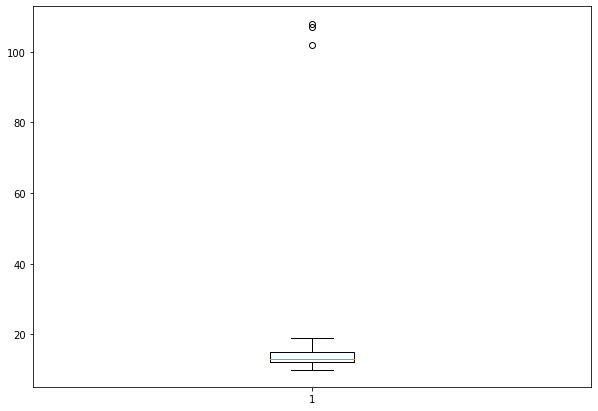

In [115]:
plt.figure(figsize=(10,7))
plt.boxplot(np.array(dataset))
plt.plot()

**Using Z score**

Z score = (Observation - mean)/ Standard Deviation

Theory:
- in a normal distribution most of the datapoints appears to be within the range of std deviation of 3. so we will be checking if any point is outside that range or not.

In [116]:
outliers = []

threshold = 3
mean = np.mean(dataset)
std = np.std(dataset)
print(f'the mean is {mean} and standard deviation is {std}')


for element in dataset:
  zscore = np.abs((element-mean)/std)

  if zscore > threshold:
    outliers.append(element)
print(outliers)

the mean is 21.176470588235293 and standard deviation is 26.37230118696876
[102, 107, 108]


**Check using Inter Quartile Range**
- Sort the data points
- find the 25% and 75% percentile
- IQR = 75% - 25%
- lower bound = 25% percentile - 1.5*IQR
- upper bound = 75% percentile + 1.5*IQR
- if data point > upper bound or data point < lower bound -> outliers 

In [117]:
dataset_sorted = sorted(dataset)

In [118]:
lower,upper = np.percentile(dataset_sorted,(25,75))
IQR = upper - lower
lowerbound = lower - 1.5*IQR
upperbound = upper + 1.5*IQR
print(f'IQR {IQR},\nlowerbound {lowerbound},\nupperbound {upperbound},\nlower {lower},\nupper {upper}')

IQR 3.0,
lowerbound 7.5,
upperbound 19.5,
lower 12.0,
upper 15.0


In [119]:
outpoints = [element for element in dataset if (element < lowerbound) or (element > upperbound)]

In [120]:
outpoints

[102, 107, 108]